In [7]:
import pandas as pd
pd.set_option('display.max_columns', 500)

df = pd.read_csv('cleaned_train.csv')

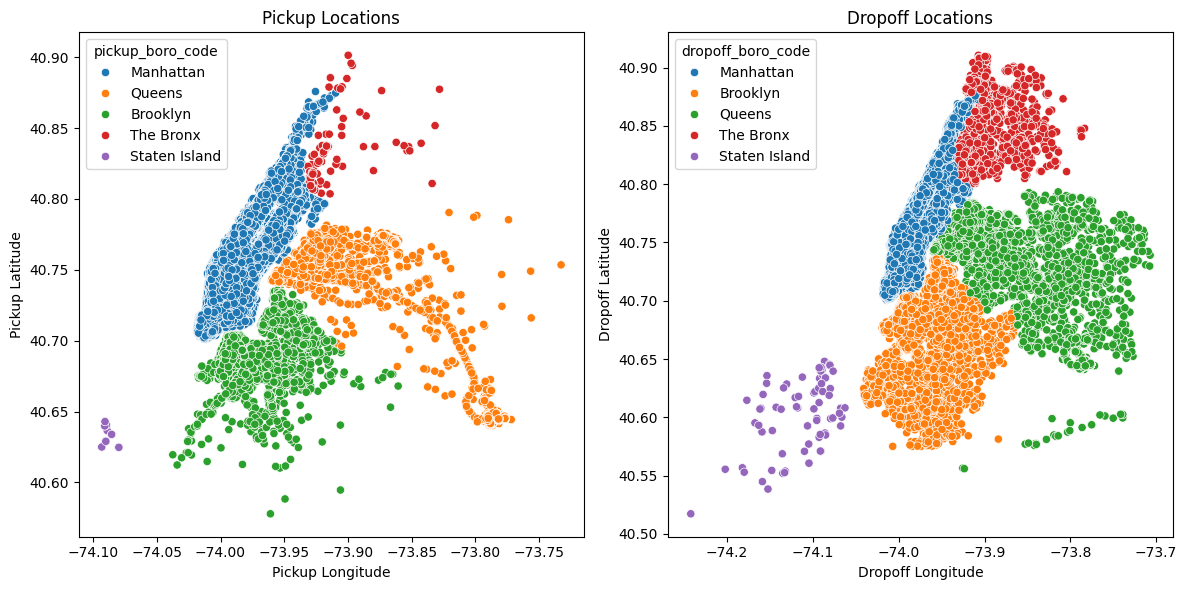

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for pickup locations
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', hue='pickup_boro_code', data=df, ax=axes[0])
axes[0].set_xlabel('Pickup Longitude')
axes[0].set_ylabel('Pickup Latitude')
axes[0].set_title('Pickup Locations')

# Scatter plot for dropoff locations
sns.scatterplot(x='dropoff_longitude', y='dropoff_latitude', hue='dropoff_boro_code', data=df, ax=axes[1])
axes[1].set_xlabel('Dropoff Longitude')
axes[1].set_ylabel('Dropoff Latitude')
axes[1].set_title('Dropoff Locations')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

## Clustering to narrow down neighborhoods and ntas to a managable number

/Users/kubamalachowski/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


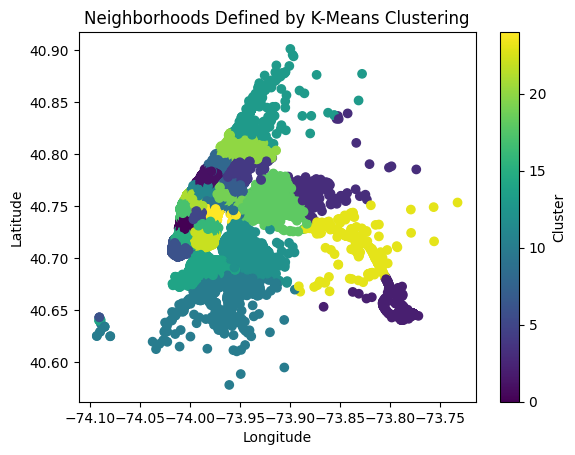

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming df contains latitude and longitude columns
X = df[['pickup_latitude', 'pickup_longitude']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of neighborhoods (clusters)
n_clusters = 25

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# Plot clustered points
plt.scatter(df['pickup_longitude'], df['pickup_latitude'], c=df['cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Neighborhoods Defined by K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()
